In [73]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import json

In [77]:
def fall_times(jsonfile, log_start=350000, n_files=10):
    all_delays = {}
    f = open(jsonfile, 'r')
    data = json.load(f)
    f.close()
    
    for file in data:
        distype, _, n_shards, _, _ = file.split()
        pv, b = data[file]
        delays = []
        
        for shard in pv:
            point_exits = False
            for i, p, t in pv[shard]:
                if p == -1 and i > b[shard]:
                    delays.append(t - log_start)
                    point_exits = True
                    break
            if not point_exits:
                i, p, t = pv[shard][-1]
                delays.append(t - log_start)
                
        delays.sort()
        if (distype, n_shards) in all_delays:
            all_delays[(distype, n_shards)] = [x + y for x, y in zip(all_delays[(distype, n_shards)], delays)]
        else:
            all_delays[(distype, n_shards)] = delays

    for d in all_delays:
        all_delays[d] = [x / n_files for x in all_delays[d]]
    return all_delays

In [78]:
def plot_shards(data, shards, distype, savefile):
    plt.plot(shards, [data[(distype,str(i))][0] for i in shards], label='first')
    plt.plot(shards, [data[(distype,str(i))][len(data[(distype,str(i))]) //2 ] for i in shards], label='mv')
    plt.plot(shards, [data[(distype,str(i))][-1] for i in shards], label='all')
    plt.xlabel('shards')
    plt.ylabel('time')
    plt.title(distype)
    lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(savefile, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [83]:
ad = fall_times('new_results.json')

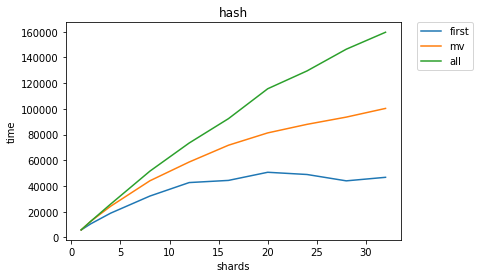

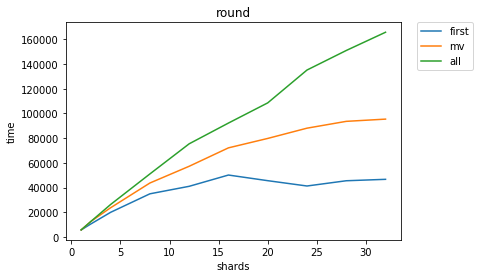

In [84]:
shards = [1,2,4,8,12,16,20,24,28,32]
plot_shards(ad, shards,'hash','hash.png')
plot_shards(ad, shards,'round','round.png')

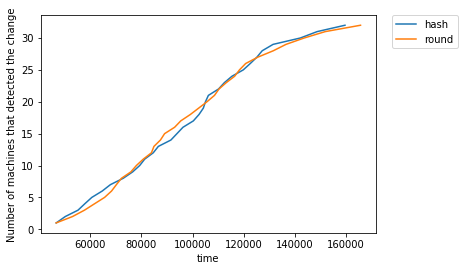

In [86]:
n_shards = 32
savefile = f'hash and round {n_shards}.png'

plt.plot(ad[('hash',str(n_shards))] , range(1, n_shards + 1), label='hash')
plt.plot(ad[('round',str(n_shards))], range(1, n_shards + 1), label='round')
plt.xlabel('time')
plt.ylabel('Number of machines that detected the change')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(savefile, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()